                   count       mean         std      min       25%       50%  \
id                 100.0   50.50000   29.011492    1.000   25.7500   50.5000   
radius             100.0   16.85000    4.879094    9.000   12.0000   17.0000   
texture            100.0   18.23000    5.192954   11.000   14.0000   17.5000   
perimeter          100.0   96.78000   23.676089   52.000   82.5000   94.0000   
area               100.0  702.88000  319.710895  202.000  476.7500  644.0000   
smoothness         100.0    0.10273    0.014642    0.070    0.0935    0.1020   
compactness        100.0    0.12670    0.061144    0.038    0.0805    0.1185   
symmetry           100.0    0.19317    0.030785    0.135    0.1720    0.1900   
fractal_dimension  100.0    0.06469    0.008151    0.053    0.0590    0.0630   

                       75%       max  
id                  75.250   100.000  
radius              21.000    25.000  
texture             22.250    27.000  
perimeter          114.250   172.000  
area

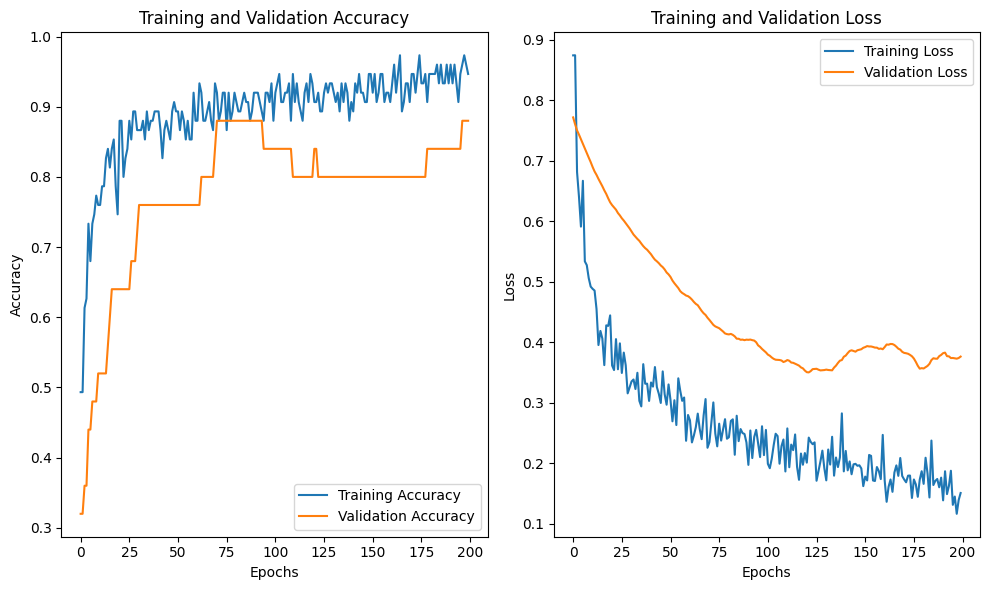

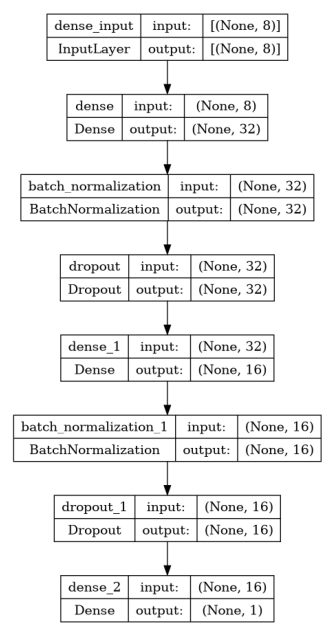

In [1]:
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from keras.utils import plot_model  # Import plot_model from keras.utils
from matplotlib import pyplot as plt



# Reading the dataset
df = pd.read_csv('/kaggle/input/prostate-cancer/Prostate_Cancer.csv')

print(df.describe().T)  #Values need to be normalized before fitting. 
print(df.isnull().sum())
#df = df.dropna()

#Rename Dataset to Label to make it easy to understand
df = df.rename(columns={'diagnosis_result':'Label'})
print(df.dtypes)

#Understand the data 
#sns.countplot(x="Label", data=df) #M - malignant   B - benign


####### Replace categorical values with numbers########
df['Label'].value_counts()

#Define the dependent variable that needs to be predicted (labels)
y = df["Label"].values

# 3. Data Visualization:
# Initializing lists to store accuracies and losses for a specific split
train_accuracy = []
val_accuracy = []
train_loss = []
val_loss = []
# Convert binary labels to 0 and 1
Y = df["Label"].map({"M": 1, "B": 0}).values

#################################################################
#Define x and normalize values

#Define the independent variables. Let's also drop Gender, so we can normalize other data
X = df.drop(labels = ["Label", "id"], axis=1) 


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Defining the specific split to analyze (split 99)
specific_split = 99

# Splitting data into train and test sets for the specific split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=specific_split)

# 4. Neural Network Choice:
# Building a Sequential model
model = Sequential()
model.add(Dense(32, input_dim=8, activation='relu'))  # Increase neurons
model.add(tf.keras.layers.BatchNormalization())  # Batch Normalization
model.add(Dropout(0.05))  # Increase dropout
model.add(Dense(16, activation='relu'))  # Additional hidden layer
model.add(tf.keras.layers.BatchNormalization())
model.add(Dropout(0.09))
model.add(Dense(1, activation='sigmoid'))  # Output Layer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
train_accuracy = model.evaluate(X_train, y_train, verbose=0)[1]
val_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Final Training Accuracy: {train_accuracy:.4f}")
print(f"Final Validation Accuracy: {val_accuracy:.4f}")


# Evaluate the model on the test set to get the final test accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Final Test Accuracy: {test_accuracy:.4f}")

# Appending training/validation loss and accuracy for plotting
train_accuracy_list = history.history['accuracy']
val_accuracy_list = history.history['val_accuracy']
train_loss_list = history.history['loss']
val_loss_list = history.history['val_loss']

# Plotting training/validation accuracy and loss in one graph for the specific split
plt.figure(figsize=(10, 6))

# Plotting training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(train_accuracy_list, label='Training Accuracy')
plt.plot(val_accuracy_list, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(train_loss_list, label='Training Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Visualizing the neural network diagram
plot_model(model, to_file='neural_network_diagram.png', show_shapes=True, show_layer_names=True)

# Displaying the neural network diagram
nn_diagram = plt.imread('neural_network_diagram.png')
plt.figure(figsize=(8, 8))
plt.imshow(nn_diagram)
plt.axis('off')
plt.show()

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/prostate-cancer/Prostate_Cancer.csv
